__LIBRERIAS__

In [101]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

__CARGA DE DATOS__

In [102]:
encoding='cp1252'

In [103]:
os.getcwd()
path = '..\\datosOriginales\\' #ruta donde se encuentran los datos
path1 = '..\\datosTransformados\\' # ruta donde se van a guardar los datos limpios
df = pd.read_csv(path+'datos_sabi.csv', encoding = "ISO-8859-1", index_col=[0])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


__IMPORTAR MODULOS CREADOS POR NOSOTROS__

In [104]:
import Funciones as fn #Funciones es el nombre del script dnd hemos creado las funciones

__DATA DISCOVERING__

In [105]:
df.head(2)

,nombre,codigo_nif,localidad,estado_detallado,fecha_cambio_estado,estado,ultimo_ano_disponible,fecha_constitucion,codigo_primario_cnae_2009,fase_actual,...,resultado_financiero_mil_eur,resultados_actividades_extraordinarias_mil_eur,rotacion_de_activos_netos_percent,rotacion_de_las_existencias_percent,tesoreria_mil_eur,total_activo_mil_eur,total_activos_por_empleado_mil,total_pasivo_y_capital_propio_mil_eur,valor_agregado_mil_eur,sector
1,ABEREKIN SOCIEDAD ANONIMA,A48165468,DERIO,Activa,1985-01-31,Activa,2020-12-31,1985-01-31,149,NaN,...,-45.0,NaN,0.515,2.621,832.0,8953.0,426.333333,8953.0,1614.0,Agricultura
2,ABEREKIN SOCIEDAD ANONIMA,A48165468,DERIO,Activa,1985-01-31,Activa,2020-12-31,1985-01-31,149,NaN,...,40.0,NaN,0.590,2.558,767.0,7147.0,324.863636,7147.0,1606.0,Agricultura


In [106]:
df.shape #dimensiones (207144, 85)

(207144, 85)

In [107]:
df.columns

Index(['nombre', 'codigo_nif', 'localidad', 'estado_detallado',
       'fecha_cambio_estado', 'estado', 'ultimo_ano_disponible',
       'fecha_constitucion', 'codigo_primario_cnae_2009', 'fase_actual',
       'fecha_fase_actual', 'incidencias_judiciales', 'tipo', 'anyo',
       'acreedores_a_l_p_mil_eur', 'acreedores_comerciales_mil_eur',
       'activo_circulante_mil_eur', 'apalancamiento_percent_percent',
       'beneficio_por_empleado_mil', 'capital_circulante_por_empleado_mil',
       'capital_suscrito_mil_eur', 'cash_flow_mil_eur',
       'coeficiente_de_solvencia_percent_percent',
       'consumo_de_mercaderias_y_de_materias_mil_eur',
       'coste_medio_de_los_empleados_mil',
       'costes_de_los_trabajadores_ingresos_de_explotacion_percent_percent',
       'deudas_financieras_mil_eur', 'deudores_mil_eur',
       'dotaciones_para_amortiz_de_inmovil_mil_eur', 'ebit_mil_eur',
       'ebitda_mil_eur', 'existencias_mil_eur', 'fondo_de_maniobra_mil_eur',
       'fondos_propios_mil_e

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207144 entries, 1 to 207144
Data columns (total 85 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   nombre                                                              207144 non-null  object 
 1   codigo_nif                                                          207144 non-null  object 
 2   localidad                                                           207144 non-null  object 
 3   estado_detallado                                                    203052 non-null  object 
 4   fecha_cambio_estado                                                 207144 non-null  object 
 5   estado                                                              207144 non-null  object 
 6   ultimo_ano_disponible                                               207144 non-null  object 
 7   fe

Estadisticos

In [109]:
df.describe() #con las variables continuas

,codigo_primario_cnae_2009,incidencias_judiciales,acreedores_a_l_p_mil_eur,acreedores_comerciales_mil_eur,activo_circulante_mil_eur,apalancamiento_percent_percent,beneficio_por_empleado_mil,capital_circulante_por_empleado_mil,capital_suscrito_mil_eur,cash_flow_mil_eur,...,resultado_explotacion_mil_eur,resultado_financiero_mil_eur,resultados_actividades_extraordinarias_mil_eur,rotacion_de_activos_netos_percent,rotacion_de_las_existencias_percent,tesoreria_mil_eur,total_activo_mil_eur,total_activos_por_empleado_mil,total_pasivo_y_capital_propio_mil_eur,valor_agregado_mil_eur
count,207144.000000,27624.000000,6.768200e+04,90018.000000,121710.000000,1.219220e+05,103915.000000,103915.000000,121847.000000,1.209770e+05,...,120943.000000,1.217270e+05,777.000000,121923.000000,6.552600e+04,115397.000000,1.219270e+05,103915.000000,1.219270e+05,1.210910e+05
mean,5113.387962,0.538662,1.205845e+03,324.494170,1104.595026,-1.102920e+02,3.846684,50.108400,267.050258,8.037782e+01,...,61.463659,-3.231162e+01,806.078526,4.804117,6.000230e+03,207.370075,2.384034e+03,305.433491,2.384034e+03,5.239299e+02
std,1711.245186,1.708351,2.990624e+04,3805.860293,9073.225006,9.392063e+04,470.078500,401.557447,3282.325358,6.829292e+03,...,2225.429338,5.293213e+03,21439.037190,255.976143,8.353041e+05,2382.096194,2.679318e+04,3786.007149,2.679318e+04,7.411190e+03
min,111.000000,0.000000,1.000000e-05,0.000010,0.000010,-2.960187e+07,-92265.567000,-3355.843533,0.002000,-1.513273e+06,...,-269817.789000,-1.245337e+06,-21185.316000,-36887.803000,0.000000e+00,0.000010,0.000000e+00,0.002929,0.000000e+00,-1.496949e+06
25%,4121.000000,0.000000,2.623589e+01,6.848045,47.202077,0.000000e+00,-2.313417,1.896023,3.010000,-7.083300e-01,...,-6.578885,-4.857945e+00,-1.152160,0.538000,5.503250e+00,8.791860,9.672809e+01,31.876756,9.672809e+01,5.115119e+01
50%,4941.000000,0.000000,9.564030e+01,27.643005,139.271300,2.423000e+00,1.093680,11.200850,9.000000,1.199281e+01,...,5.698350,-6.991100e-01,0.304210,1.772000,1.672800e+01,31.041700,2.788271e+02,67.326746,2.788271e+02,1.441055e+02
75%,6622.000000,1.000000,3.069215e+02,100.245378,453.048373,7.391350e+01,6.389834,30.658288,60.104000,5.140903e+01,...,33.626285,0.000000e+00,10.698050,4.428000,5.559000e+01,101.444890,8.569570e+02,144.397353,8.569570e+02,3.634524e+02
max,9319.000000,60.000000,3.620725e+06,450745.000000,893439.000000,7.723002e+06,45283.202000,24030.244000,274716.530000,5.961470e+05,...,408562.000000,2.262457e+05,596168.000000,30561.698000,1.658331e+08,319462.000000,3.657268e+06,375135.215000,3.657268e+06,5.961630e+05


In [110]:
#Con las variables discretas
df['localidad'].value_counts().to_frame() 
df['estado_detallado'].value_counts().to_frame() #las tildes se ven mal, cambiar el encoding
df['estado'].value_counts().to_frame() 
df['fase_actual'].value_counts().to_frame()  #las tildes se ven mal, cambiar el encoding
df['tipo'].value_counts().to_frame() #solo hay un tipo, lo demas son NA
df['sector'].value_counts().to_frame() 


,sector
Industria,53136
Construccion,44400
Hosteleria,38964
Servicios,33468
Transporte,22836
Agricultura,7464
Deporte,6876


__DATA CLEANING__

Correccion del tipo:

In [111]:
df['ultimo_ano_disponible'].value_counts()

2020-12-31    114384
2019-12-31     18888
2018-12-31     11076
2017-12-31      5820
2011-12-31      4932
               ...  
2020-12-26        12
2016-09-15        12
2009-03-31        12
2012-06-30        12
2006-06-30        12
Name: ultimo_ano_disponible, Length: 129, dtype: int64

In [112]:
fn.corregir_tipo(df= df, columnas= ['nombre','codigo_nif', 'localidad',  'sector'], tipo= 'string') #las pasamos a tipo string. 
#Algunas no nos deja cambiarlas porque tienen NAN: estado_detallado, fase_actual, 'codigo_primario_cnae_2009'
fn.convertir_datetime(df, ['fecha_cambio_estado','ultimo_ano_disponible','fecha_constitucion', 'fecha_fase_actual'])

Corregimos columna anyo

In [113]:
df[df['anyo'] == 'ult_ano_disp'][['anyo']] # hay filas con valor ult_ano_disp. Lo tenemos que sustituir con el ultimo año disponible de esa empresa
                                           # que aparece en la variable ultimo_ano_disponible.

,anyo
1,ult_ano_disp
13,ult_ano_disp
25,ult_ano_disp
37,ult_ano_disp
49,ult_ano_disp
...,...
207085,ult_ano_disp
207097,ult_ano_disp
207109,ult_ano_disp
207121,ult_ano_disp


In [114]:
df['ultimo_ano_disponible'] = df['ultimo_ano_disponible'].dt.year # nos quedamos solo con el año

In [115]:
df['anyo'] = np.where(df['anyo'] == 'ult_ano_disp', df['ultimo_ano_disponible'], df['anyo']) # remplazamos los valores ult_ano_disp


In [116]:
df[df['anyo']== 'ult_ano_disp']#correcto

,nombre,codigo_nif,localidad,estado_detallado,fecha_cambio_estado,estado,ultimo_ano_disponible,fecha_constitucion,codigo_primario_cnae_2009,fase_actual,...,resultado_financiero_mil_eur,resultados_actividades_extraordinarias_mil_eur,rotacion_de_activos_netos_percent,rotacion_de_las_existencias_percent,tesoreria_mil_eur,total_activo_mil_eur,total_activos_por_empleado_mil,total_pasivo_y_capital_propio_mil_eur,valor_agregado_mil_eur,sector


In [117]:
fn.convertir_datetime(df, 'anyo')
df['anyo'] = df['anyo'].dt.year 
fn.convertir_datetime(df, 'anyo') # volvemos a convertirlo a datetime ya que se ha vuelto a cambiar

In [118]:
fn.convertir_datetime(df, 'ultimo_ano_disponible')

In [119]:
df = df[df['anyo'] <= df['ultimo_ano_disponible']] # eliminamos los datos de los años superiores al ultimo año disponible, ya que, como es logico, no tienen informacion

Duplicados

In [120]:
#Quitamos filas duplicadas

fn.eliminar_duplicados(df)

In [121]:
df.shape

(166912, 85)

In [122]:
#identificamos columnas duplicadas
fn.columnas_duplicadas(df) # no hay ninguna

[]


Missings

In [123]:
missings = fn.view_nan(df)
missings

,NA,NOT_NA,pct
tipo,166893,19,99.98861675613497 %
gastos_extraordinarios_mil_eur,166409,503,99.69864359662577 %
ingresos_extraordinarios_mil_eur,166303,609,99.63513707822086 %
resultados_actividades_extraordinarias_mil_eur,166135,777,99.53448523773007 %
provisiones_mil_eur,164022,2890,98.26854869631902 %
...,...,...,...
ultimo_ano_disponible,0,166912,0.0 %
estado,0,166912,0.0 %
fecha_cambio_estado,0,166912,0.0 %
localidad,0,166912,0.0 %


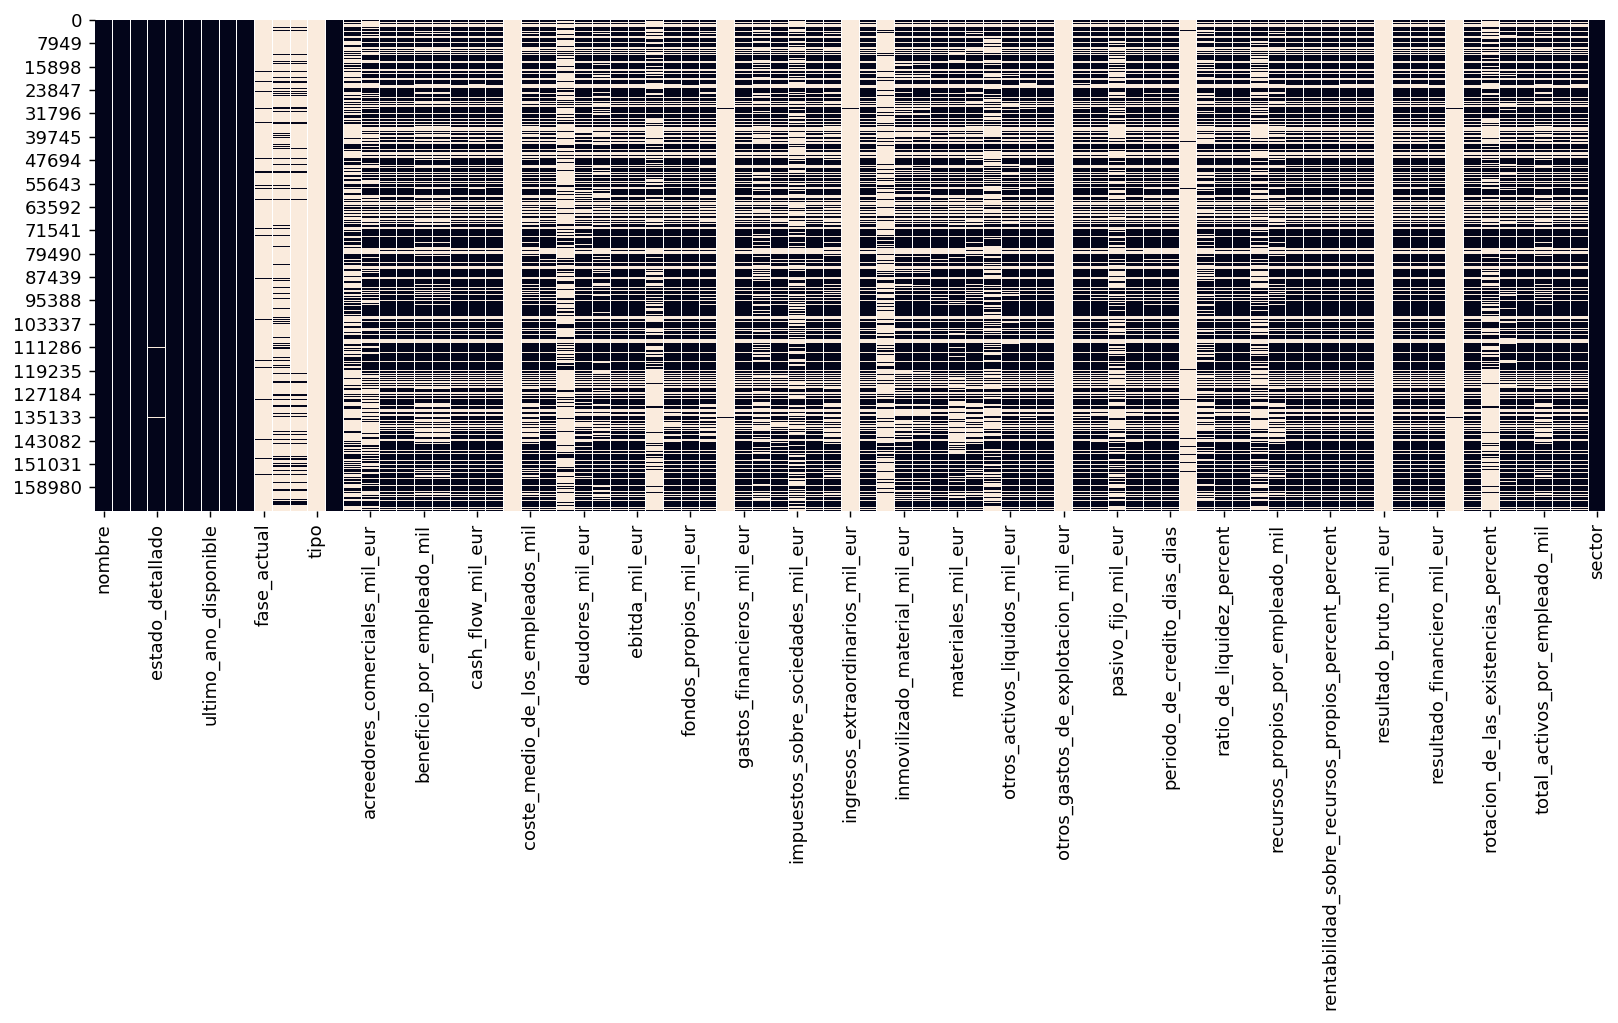

In [124]:
#objetos
fig, ax = plt.subplots()

#Grafico
sns.heatmap(df.isnull(), cbar=False) #visualizamos los missings

#formato figura
fig.set_size_inches(15,5)
fig.set_dpi(130) 

# Vemos que muchas variables tienen muchos valores ausentes, algunas, como son datos del balance de las empresas, no las vamos a eliminar. En cambio, 
# la variable "tipo" solo contiene 19 valores completos, que pone "abreviado". Las eliminamos ya que no aporta valor. 

In [125]:
df[df.total_activo_mil_eur.isna()] # nos damos cuenta de que en las filas que hay NAN en 'total_activo_mil_eur' hay NAN en todas las variables que pertenecen al balance
# estas instancias no aportan valor, ya que no tienen informacion

,nombre,codigo_nif,localidad,estado_detallado,fecha_cambio_estado,estado,ultimo_ano_disponible,fecha_constitucion,codigo_primario_cnae_2009,fase_actual,...,resultado_financiero_mil_eur,resultados_actividades_extraordinarias_mil_eur,rotacion_de_activos_netos_percent,rotacion_de_las_existencias_percent,tesoreria_mil_eur,total_activo_mil_eur,total_activos_por_empleado_mil,total_pasivo_y_capital_propio_mil_eur,valor_agregado_mil_eur,sector
25,ACCION PAULIANA S.L.,B31881113,BERA,Reapertura de hoja registral: El Registro Merc...,2019-11-08,Activa,1970-01-01 00:00:00.000002020,2006-03-31,147,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agricultura
26,ACCION PAULIANA S.L.,B31881113,BERA,Reapertura de hoja registral: El Registro Merc...,2019-11-08,Activa,1970-01-01 00:00:00.000002020,2006-03-31,147,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agricultura
27,ACCION PAULIANA S.L.,B31881113,BERA,Reapertura de hoja registral: El Registro Merc...,2019-11-08,Activa,1970-01-01 00:00:00.000002020,2006-03-31,147,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agricultura
37,ACROGEA SL.,B71153415,CINTRUENIGO,Activa,2013-09-24,Activa,1970-01-01 00:00:00.000002020,2013-09-24,147,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agricultura
38,ACROGEA SL.,B71153415,CINTRUENIGO,Activa,2013-09-24,Activa,1970-01-01 00:00:00.000002020,2013-09-24,147,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agricultura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166864,ZUBIETA LOGISTICA SOCIEDAD LIMITADA.,B95860003,AMOREBIETA-ETXANO,Activa,2016-10-14,Activa,1970-01-01 00:00:00.000002020,2016-10-14,4941,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transporte
166865,ZUBIETA LOGISTICA SOCIEDAD LIMITADA.,B95860003,AMOREBIETA-ETXANO,Activa,2016-10-14,Activa,1970-01-01 00:00:00.000002020,2016-10-14,4941,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transporte
166886,ZULAICA GARRAIOAK SL,B20400826,DEBA,Activa,2015-12-31,Activa,1970-01-01 00:00:00.000002016,1992-01-31,4941,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transporte
166887,ZULAICA GARRAIOAK SL,B20400826,DEBA,Activa,2015-12-31,Activa,1970-01-01 00:00:00.000002016,1992-01-31,4941,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transporte


In [126]:
missings_variables = fn.view_nan(df[df.total_activo_mil_eur.isna()])
missings_variables.iloc[9:,:] # 100% de missings

,NA,NOT_NA,pct
otros_activos_liquidos_mil_eur,44985,0,100.0 %
otros_activos_fijos_mil_eur,44985,0,100.0 %
numero_empleados,44985,0,100.0 %
ingresos_extraordinarios_mil_eur,44985,0,100.0 %
pasivo_liquido_mil_eur,44985,0,100.0 %
...,...,...,...
ultimo_ano_disponible,0,44985,0.0 %
estado,0,44985,0.0 %
fecha_cambio_estado,0,44985,0.0 %
localidad,0,44985,0.0 %


In [127]:
df.drop(df[df.total_activo_mil_eur.isnull()].index, inplace = True) # eliminamos esas filas con todo NAN

In [128]:
#quitar la variable tipo ya que tiene un 99.98% de valores NA
df.drop(columns='tipo', inplace=True)

In [129]:
missings1 =fn.view_nan(df)
missings1 # hay tres variables con 100% de valores vacios, las eliminamos

,NA,NOT_NA,pct
gastos_extraordinarios_mil_eur,121424,503,99.58745806917254 %
ingresos_extraordinarios_mil_eur,121318,609,99.50052080343156 %
resultados_actividades_extraordinarias_mil_eur,121150,777,99.36273343886096 %
provisiones_mil_eur,119037,2890,97.62972926423188 %
fase_actual,113942,7985,93.45099936847457 %
...,...,...,...
ultimo_ano_disponible,0,121927,0.0 %
estado,0,121927,0.0 %
fecha_cambio_estado,0,121927,0.0 %
localidad,0,121927,0.0 %


In [130]:
df.drop(columns= ['consumo_de_mercaderias_y_de_materias_mil_eur', 'otros_gastos_de_explotacion_mil_eur', 'resultado_bruto_mil_eur'], inplace=True)

In [131]:
missings2 = fn.view_nan(df)
missings2

,NA,NOT_NA,pct
gastos_extraordinarios_mil_eur,121424,503,99.58745806917254 %
ingresos_extraordinarios_mil_eur,121318,609,99.50052080343156 %
resultados_actividades_extraordinarias_mil_eur,121150,777,99.36273343886096 %
provisiones_mil_eur,119037,2890,97.62972926423188 %
fase_actual,113942,7985,93.45099936847457 %
...,...,...,...
ultimo_ano_disponible,0,121927,0.0 %
estado,0,121927,0.0 %
fecha_cambio_estado,0,121927,0.0 %
localidad,0,121927,0.0 %


In [132]:
df["fase_actual"].value_counts()

EXTINCIÓN                                               4022
DISOLUCIÓN                                              1081
EXTINCI<d3>N                                            1062
REAPERTURA HOJA REGISTRAL                                366
LIQUIDACION CONCURSAL                                    317
FUSIÓN POR ABSORCIÓN                                     278
DISOLUCI<d3>N                                            210
ESCISIÓN TOTAL                                           122
EN SITUACION DE CONCURSO                                 118
CONCURSO CONCLUIDO                                        70
FUSI<d3>N POR ABSORCI<d3>N                                60
CONCURSO/APROBACION JUDICIAL DEL CONVENIO                 54
CONCURSO/INFORME ADMINISTRACION CONCURSAL                 43
ART 378.5 DEL REG REG MERCANTIL                           34
CONCURSO/PRIMERA JUNTA DE ACREEDORES                      24
CONCURSO/NOMBRAMIENTO DE ADMINISTRADORES CONCURSALES      18
CONCURSO/DECLARACION    

In [133]:
# Hay palabras en "fase actual" que contienen un caracter extraño: "<d3>". Lo sustituimos por la letra O, que es la que le pertenece.
df['fase_actual'].value_counts().to_frame()
# Además quitamos todas las tildes por seacaso
diccionario  = {'Ó':'O',"À":"A",'É':'E', 'Í':'I', 'Ú':'U', '<d3>':'O','/':': '}
for key, value in diccionario.items():
    df['fase_actual'] = df['fase_actual'].str.replace(key, value)

In [134]:
df['fase_actual'].fillna('SIN INFORMACION', inplace=True) # cambiamos los valores vacios por "SIN INFORMACION"
df["fase_actual"].value_counts() #correcto

SIN INFORMACION                                          113942
EXTINCION                                                  5084
DISOLUCION                                                 1291
REAPERTURA HOJA REGISTRAL                                   366
FUSION POR ABSORCION                                        338
LIQUIDACION CONCURSAL                                       317
ESCISION TOTAL                                              122
EN SITUACION DE CONCURSO                                    118
CONCURSO CONCLUIDO                                           70
CONCURSO: APROBACION JUDICIAL DEL CONVENIO                   54
CONCURSO: INFORME ADMINISTRACION CONCURSAL                   43
ART 378.5 DEL REG REG MERCANTIL                              34
CONCURSO: PRIMERA JUNTA DE ACREEDORES                        24
REACTIVACION DE LA SOCIEDAD                                  20
CONCURSO: NOMBRAMIENTO DE ADMINISTRADORES CONCURSALES        18
CONCURSO: DECLARACION                   

In [135]:
missings3 = fn.view_nan(df)
missings3

,NA,NOT_NA,pct
gastos_extraordinarios_mil_eur,121424,503,99.58745806917254 %
ingresos_extraordinarios_mil_eur,121318,609,99.50052080343156 %
resultados_actividades_extraordinarias_mil_eur,121150,777,99.36273343886096 %
provisiones_mil_eur,119037,2890,97.62972926423188 %
incidencias_judiciales,106239,15688,87.13328467033553 %
...,...,...,...
ultimo_ano_disponible,0,121927,0.0 %
estado,0,121927,0.0 %
fecha_cambio_estado,0,121927,0.0 %
localidad,0,121927,0.0 %


In [136]:
# las variables con un porcentaje muy elevado de missings no van a poder usarse para predecir, por lo que creamos un nuevo df sin ellas. 

In [137]:
df.shape

(121927, 81)

In [138]:
fn.Eliminar_na_por_df(df, pct_max_NA=87) #DECIDIR QUE PORCENTAJE

In [139]:
df.shape # se han eliminado 5 columnas

(121927, 76)

In [140]:
## meter lo de julene y volver a calcular los ratios

Outliers

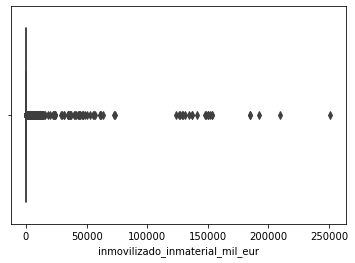

In [141]:
sns.boxplot(x=df['inmovilizado_inmaterial_mil_eur'])

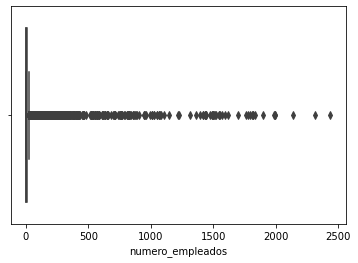

In [142]:
sns.boxplot(x=df['numero_empleados'])

Importamos el nuevo excel de empresas que han entrado en concurso 

In [143]:
# necesitamos saber que empresas han entrado en concurso o son deudoras, a traves de la tabla de concurso. 
# Si aparecen en esta segunda tabla en la columna deudor, significa que son deudoras
concurso = pd.read_csv(path+'publicidad_concursal.csv', encoding = "ISO-8859-1")

In [144]:
# Juntamos las dos tablas
df = df.rename(columns={'codigo_nif': 'nif'})
df_total = pd.merge(df, concurso, on="nif",how='inner')

In [145]:
df_total[['nombre','deudor','nif']]

,nombre,deudor,nif
0,DUDEA EGITURAK SOCIEDAD LIMITADA. (EXTINGUIDA),"DUDEA EGITURAK, S.L.",B95006128
1,DUDEA EGITURAK SOCIEDAD LIMITADA. (EXTINGUIDA),"DUDEA EGITURAK, S.L.",B95006128
2,DUDEA EGITURAK SOCIEDAD LIMITADA. (EXTINGUIDA),"DUDEA EGITURAK, S.L.",B95006128
3,DUDEA EGITURAK SOCIEDAD LIMITADA. (EXTINGUIDA),"DUDEA EGITURAK, S.L.",B95006128
4,DUDEA EGITURAK SOCIEDAD LIMITADA. (EXTINGUIDA),"DUDEA EGITURAK, S.L.",B95006128
...,...,...,...
21020,ZUBELTRANS SL (EXTINGUIDA),ZUBELTRANS SOCIEDAD LIMITADA EN LIQUIDACION,B48889356
21021,ZUBELTRANS SL (EXTINGUIDA),ZUBELTRANS SOCIEDAD LIMITADA EN LIQUIDACION,B48889356
21022,ZUBELTRANS SL (EXTINGUIDA),ZUBELTRANS SOCIEDAD LIMITADA EN LIQUIDACION,B48889356
21023,ZUBELTRANS SL (EXTINGUIDA),ZUBELTRANS SOCIEDAD LIMITADA EN LIQUIDACION,B48889356


In [146]:
# intentamos poner los nombres de las empresas de las dos tablas originales con el mismo nombre:
# Quitar signos de puntuacion
df_total["nombre"] = df_total['nombre'].str.replace('[^\w\s]','')
df_total["deudor"] = df_total['deudor'].str.replace('[^\w\s]','')

# Pasar a mayusculas
df_total["nombre"] = df_total['nombre'].str.upper()
df_total["deudor"] = df_total['deudor'].str.upper()

# Cambiar SL
df_total["nombre"] = df_total['nombre'].str.replace('SOCIEDAD LIMITADA','SL')
df_total["deudor"] = df_total['deudor'].str.replace('SOCIEDAD LIMITADA','SL')

# Cambiar SA
df_total["nombre"] = df_total['nombre'].str.replace('SOCIEDAD ANONIMA','SA')
df_total["deudor"] = df_total['deudor'].str.replace('SOCIEDAD ANONIMA','SA')

# Cambiar Extinguida | Liquidacion
df_total["nombre"] = df_total['nombre'].str.replace('EXTINGUIDA','')
df_total["deudor"] = df_total['deudor'].str.replace('EXTINGUIDA','')
df_total["nombre"] = df_total['nombre'].str.replace('EN LIQUIDACION','')
df_total["deudor"] = df_total['deudor'].str.replace('EN LIQUIDACION','')

97
97
97
97
97
97
97
98
98
98
98
98
98
98
98
93
97
100
100
100
100
100
100
100
100
100
100
100
100
100
100
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
100
100
100
100
100
99
99
99
99
100
100
100
100
100
99
99
99
99
100
100
100
100
100
99
99
99
99
100
100
100
100
100
99
99
99
99
100
100
100
100
100
99
99
99
99
100
100
100
100
100
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
98
97
97
97
99
99
99
99
99
90
95
95
90
90
90
90
90
90
95
95
90
90
90
90
90
90
95
95
90
90
90
90
90
90
95
95
90
90
90
90
90
90
95
95
90
90
90
90
90
90
95
95
90
90
90
90
90
90
95
95
90
90
90
90
90
90
95
95
90
90
90
90
90
96
96
98
98
98
100
100
100
100
100
100
98
98
98
100
100
100
100
100
100
98
98
98
100
100
100
100
100
100
98
98
98
100
100
100
100
100
100
98
98
98
100
100
100
100
100
100
98
98
98
100
100
100
100
100
100
98
98
98
100
100
100
100
100
100
98
98
98
100
100
100
100
100
100
98
98
98
98
93
93
93
100
100
100
100
93
93
93
100
100
100
100


<ipython-input-147-3d65079bf423>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nombres['similarity'] = nombres.apply(lambda x: get_similarity(x['deudor'], x['nombre']), axis = 1)


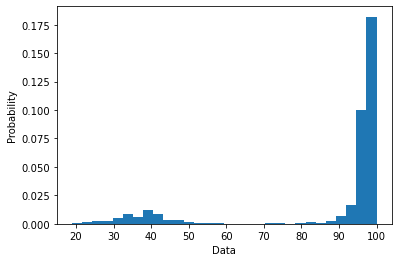

In [147]:
# obtenemos la similitud de los nombres que toma la empresa en las dos tablas originales (ahora están juntas)

from fuzzywuzzy import fuzz
def get_similarity(term1, term2):

    print(fuzz.ratio(term1, term2))

    return fuzz.ratio(term1, term2)

nombres = df_total[['nombre','deudor','nif']]
nombres['similarity'] = nombres.apply(lambda x: get_similarity(x['deudor'], x['nombre']), axis = 1)

plt.hist(nombres.similarity, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [148]:
# Los nombres de las empresas en la columna nombre que tienen una similitud mayor a 60 con el nombre en 'deudor', las calificamos como deudoras
# ya que los dos nombres hacen referencia a la misma empresa pero con un nombre algo diferente.

nif_quiebra = nombres[nombres.similarity > 60].nif
nif_estado = df_total[(df_total.estado == 'Concurso') | (df_total.estado == 'Quiebra')].nif
nif_quiebra = nif_quiebra.append(nif_estado)

# Ademas, observamos las variables estado_detallado y fase_actual por si contienen alguna palabra que describen el estado de quiebra de las empresas
# Quitar signos de puntuacion
df_total["estado_detallado"] = df_total["estado_detallado"].str.replace('[^\w\s]','')

# Pasar a mayusculas
df_total["estado_detallado"] = df_total["estado_detallado"].str.upper()
df_total["fase_actual"] = df_total["fase_actual"].str.upper()
nif_detallado = df_total[df_total.estado_detallado.str.contains('CONCURSO | CONCURSAL | QUIEBRA', na=False)].nif
nif_faseactual = df_total[df_total.fase_actual.str.contains('CONCURSO | CONCURSAL | QUIEBRA', na=False)].nif
nif_quiebra = nif_quiebra.append(nif_detallado)
nif_quiebra = nif_quiebra.append(nif_faseactual)

In [149]:
# asignamos un 1 a la empresa si ha acabado en quiebra
dict = dict.fromkeys(nif_quiebra, 1)
df['quiebra'] = df['nif'].map(dict)
df.quiebra.fillna(0, inplace=True)

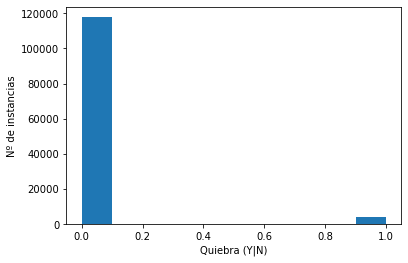

In [150]:
plt.hist(df.quiebra)  # density=False would make counts
plt.ylabel('Nº de instancias')
plt.xlabel('Quiebra (Y|N)');

In [151]:
df['quiebra'] = df['quiebra'].astype('bool')

Creamos tres grupos de empresas con los que trabaja elkargi, ya que las caracteristicas son diferentes entre ellas

In [152]:
empresas_pequeñas = df[df['numero_empleados']<=10]
empresas_medianas = df[(df['numero_empleados']>10) & (df['numero_empleados']<=50)]
empresas_grandes = df[df['numero_empleados']>50]

Seleccion de variables a utilizar para el modelo para empresas pequeñas, medianas y grandes 

In [153]:
# vamos a filtrar por empresas que no han entrado en quiebra (0) y las que si (1). Sacaremos el percentil 0.2 y 0.8 de estas primeras. 
# Despues, sacaremos la media (por variables) de las filas con 1. 
# Si esta está por debajo del cuartil 0.2 o por encima del cuartil 0.8 calculado anteriormente (con las filas de 0), calificaremos esa variable 
# como redundante. Es decir, esa variable se considerará importante a la hora de decidir si una empresa irá a quiebra o no

In [174]:
def seleccion_variables(empresas, cuartil1, cuartil2):

    '''filtramos por las empresas que no han quebrado
    y calculamos los cuartiles 20 y 80 de las variables'''
    noquiebra = empresas[empresas['quiebra'] == 0]
    q_noquiebra = noquiebra.quantile([cuartil1,cuartil2]).rename(index={cuartil1:'q20', cuartil2:'q80'})

    '''filtramos por las empresas que han quebrado
    y calculamos la media de las variables'''
    quiebra = empresas[empresas['quiebra'] == 1]
    mean_quiebra = empresas[empresas['quiebra']==1].mean().to_frame().T.rename(index={0: 'mean'})

    '''juntamos los cuartiles de las empresas que no han quebrado con
    la media de las empresas que han quebrado para poder compararlas, 
    y pivotamos la tabla'''
    mediayq = q_noquiebra.append(mean_quiebra).transpose().reset_index().rename(columns={'index':'nombre'})

    '''Seleccionamos las variables en las que la media calculada para las empresas quebradas es mayor
    al cuartil 80 0 menor al 20 de las empresas no quebradas, y añadimos el año'''
    seleccion = mediayq[(mediayq['mean'] > mediayq['q80'])| (mediayq['mean'] < mediayq['q20'])]['nombre'].to_list()
    seleccion.append('anyo') 
    print(seleccion)

    '''Nos quedamos con el nombre de esas variables y las seleccionamos sobre todo el df'''
    return empresas.loc[:,seleccion]


In [171]:
empresas_pequeñas.shape

(79625, 77)

In [176]:
seleccion_variables(empresas_pequeñas, cuartil1=0.01, cuartil2=0.99).shape

['beneficio_por_empleado_mil', 'costes_de_los_trabajadores_ingresos_de_explotacion_percent_percent', 'gastos_financieros_mil_eur', 'margen_de_beneficio_percent_percent', 'periodo_de_cobro_dias_dias', 'rentabilidad_sobre_capital_empleado_percent_percent', 'resultado_financiero_mil_eur', 'quiebra', 'anyo']


(79625, 9)